## Neural networks with PyTorch

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from torch import nn
import torch.nn.functional as F

import helper
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from six.moves import urllib

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [10]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


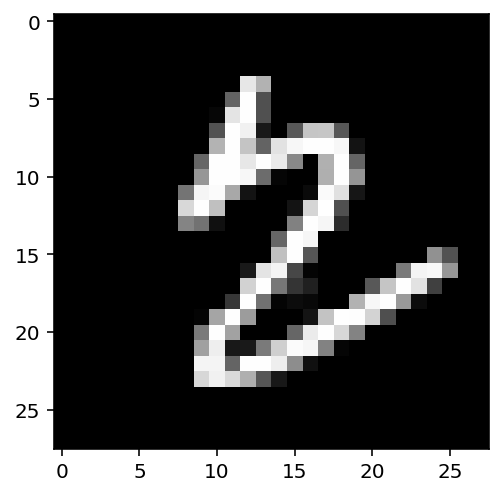

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [7]:
def activation(x):
    return 1 / (1 + torch.exp(-x))

# Flatten the input shape
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = activation(torch.mm(h, w2) + b2)

#### Softmax Fuction

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

In [11]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


### Building networks with PyTorch

In [13]:
class Network(nn.Module):
    def __init__(self):
        # Inherit Module class (mandatory)
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(786, 256)
        
        # Output layer
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(x):
        # Pass the input tensor through each of operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [14]:
# Create the network
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

You can define the network somewhat more concisely and clearly using the `torch.nn.functional` module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as `F`, `import torch.nn.functional as F`.

In [3]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        
        # Output layer
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

#### Activation functions

<img src="assets/activation.png" width=700px>

In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Define the layers
        self.fc1= nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        
        # Output layer
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

#### Initializing weights  and biases

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `model.fc1.weight` for instance.

In [4]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0025, -0.0327,  0.0149,  ..., -0.0163,  0.0053, -0.0323],
        [ 0.0057,  0.0034,  0.0061,  ...,  0.0070, -0.0139,  0.0012],
        [ 0.0228,  0.0262,  0.0248,  ..., -0.0129,  0.0092,  0.0304],
        ...,
        [-0.0182,  0.0196, -0.0083,  ...,  0.0138, -0.0281, -0.0042],
        [ 0.0227, -0.0244, -0.0170,  ..., -0.0069,  0.0343, -0.0178],
        [ 0.0281,  0.0327, -0.0229,  ...,  0.0094,  0.0295, -0.0199]],
       requires_grad=True)
Parameter containing:
tensor([-0.0087, -0.0236,  0.0305,  0.0197,  0.0244, -0.0277,  0.0317, -0.0278,
        -0.0255,  0.0348,  0.0185,  0.0101,  0.0301, -0.0339,  0.0299, -0.0023,
        -0.0060, -0.0194,  0.0332,  0.0268,  0.0118, -0.0197, -0.0057, -0.0063,
        -0.0021,  0.0122, -0.0219,  0.0227,  0.0282,  0.0209, -0.0226,  0.0172,
        -0.0079,  0.0106,  0.0124, -0.0004,  0.0246,  0.0075, -0.0023,  0.0250,
         0.0252, -0.0057,  0.0039,  0.0050, -0.0025,  0.0056, -0.0071, -0.0205,
         0.0072

For custom initialization, we want to modify these tensors in place. These are actually autograd *Variables*, so we need to get back the actual tensors with `model.fc1.weight.data`. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [5]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0133, -0.0244, -0.0072,  ...,  0.0049, -0.0066,  0.0063],
        [-0.0020,  0.0075, -0.0095,  ..., -0.0007,  0.0060, -0.0007],
        [ 0.0062, -0.0095,  0.0208,  ..., -0.0052, -0.0118, -0.0105],
        ...,
        [ 0.0162,  0.0181, -0.0056,  ...,  0.0025,  0.0085,  0.0054],
        [ 0.0077,  0.0106,  0.0256,  ..., -0.0149, -0.0142, -0.0171],
        [ 0.0088,  0.0077, -0.0028,  ..., -0.0067, -0.0124,  0.0068]])

### Forward pass

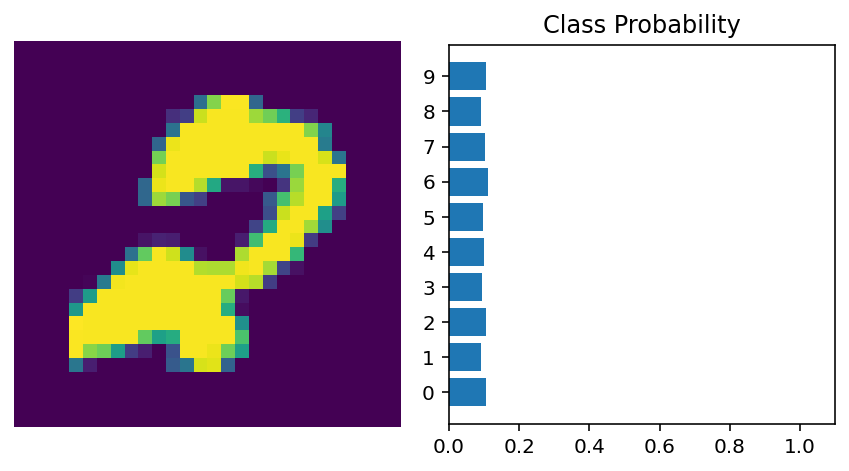

In [16]:
# Grab some data
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color chaannels, image pixels)
images.resize_(images.shape[0], 1, 784)

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx, :])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

#### Using `nn.Sequential`

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, `nn.Sequential` ([documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)). Using this to build the equivalent network:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


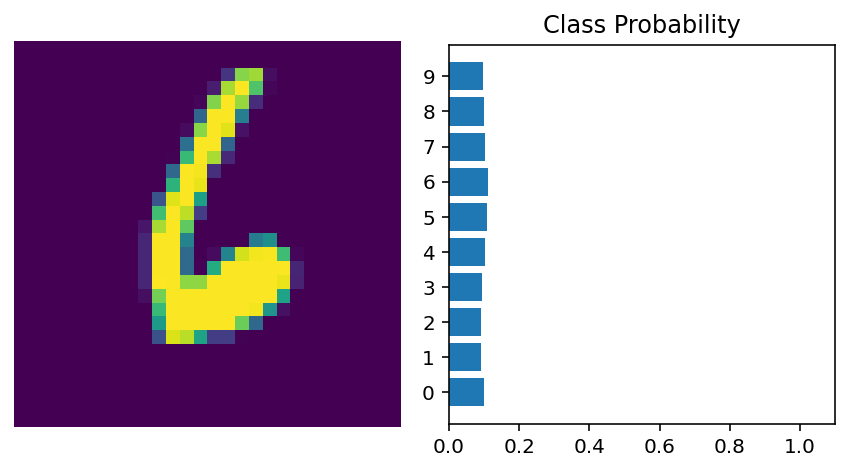

In [18]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [20]:
print(model[0])   # First linear operation
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0067, -0.0250, -0.0193,  ..., -0.0067, -0.0061, -0.0079],
        [ 0.0274,  0.0100,  0.0004,  ...,  0.0252, -0.0060, -0.0093],
        [ 0.0075, -0.0159,  0.0167,  ..., -0.0206, -0.0353, -0.0352],
        ...,
        [ 0.0304, -0.0237,  0.0277,  ..., -0.0100, -0.0034,  0.0091],
        [-0.0155,  0.0237,  0.0240,  ..., -0.0075, -0.0209,  0.0064],
        [ 0.0336, -0.0235, -0.0257,  ..., -0.0138, -0.0117, -0.0347]],
       requires_grad=True)

You can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so _each operation must have a different name_.

In [21]:
from collections import OrderedDict

model = nn.Sequential(
    OrderedDict([
        ('fc1', nn.Linear(input_size, hidden_size[0])),
        ('relu1', nn.ReLU()),
        ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
        ('relu2', nn.ReLU()),
        ('output', nn.Linear(hidden_size[1], output_size)),
        ('softmax', nn.Softmax(dim=1))
    ])
)
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [22]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
